In [ ]:
# loading libraries
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import *
from keras import backend as K
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model


In [ ]:
!pip install gdal

In [ ]:
import sys

sys.path

#sys.path.append('c:\programdata\anaconda3\envs\tf2.8\lib\site-packages (3.4.1)')

In [1]:
from osgeo import gdal
import numpy as np
from scipy.ndimage import zoom

def read_as_array(path,file_name):

    gdal_file=gdal.Open(path+'/'+file_name)

    array=np.zeros((gdal_file.RasterYSize,gdal_file.RasterXSize,gdal_file.RasterCount))
    
    for i in range(gdal_file.RasterCount):

        gdal_file_band=gdal_file.GetRasterBand(i+1)

        array[:,:,i]=gdal_file_band.ReadAsArray()
        
    return(array)     

path='D:/Nafiseh/flood_proposal'

#preflood_image_name,postflood_image_name='0417_clip_2.tif','20190428_coregis_stack_bands.tif'

#preflood_image_name,postflood_image_name='subset_1_of_S1A_IW_GRDH_1SDV_20190408T225218_20190408T225243_Cal_Spk_TC_2.tif','subset_0_of_S1A_IW_GRDH_1SDV_20190425T230019_20190425T230055_Cal_Spk_TC_4_2.tif'
#coh_image_name='S1A_IW_SLC__1SDV_20190408T225217_20190502_20190514_20190526_split_Orb_Stack_esd_coh_deb_flt_ML_TC_Stack.tif'


#preflood_array=read_as_array(path,preflood_image_name)

#postflood_array=read_as_array(path,postflood_image_name)

#postflood_array=np.delete(postflood_array,-1,axis=1)

#stack_image_name='corgistration_intensity_coh_Stack.tif'

#stack_image_name='subset_0_of_S1A_IW_GRDH_1SDV_Cal_Spk_TC_Stack_subset.tif'
#stack_image_name_2='subset_1_of_S1A_IW_GRDH_1SDV_20190408T225218_20190507T23009_Cal_Spk_TC_Stack_2_subset.tif'

GRD_SLC_stack_train_name='Stack_GRD_SLC.tif'

GRD_SLC_stack_test_name='Stack_GRD_SLC_test.tif'

dem_name='dem_gatineau.tif'

#GRT_Mask_name='flood_mask_mosaic_to_new_raster.tif'

#MNDWI_Mask_name='S2_MNDWI_flood_mask_clip3_binary_region_group_nibble_mask_nibble_boundary_clean.tif'

#stack_array=read_as_array(path,stack_image_name)
#stack_array_2=read_as_array(path,stack_image_name_2)
#label=read_as_array(path,MNDWI_Mask_name)
#label_test=read_as_array(path,GRT_Mask_name)
#label[label>=1]=1

GRD_SLC_stack_train=read_as_array(path,GRD_SLC_stack_train_name)

GRD_SLC_stack_test=read_as_array(path,GRD_SLC_stack_test_name)

dem=read_as_array(path,dem_name)

dem_r=zoom(dem,[300/dem.shape[0],300/dem.shape[1],1],order=1)

GRD_SLC_stack_train_s=GRD_SLC_stack_train[780:1080,0:300,[2,3,9,10,12,13,14,15]]

GRD_SLC_stack_test_s=GRD_SLC_stack_test[780:1080,0:300,[2,3,9,10,11,12,13,14]]

#GRD_SLC_stack_train_s=np.concatenate((GRD_SLC_stack_train[780:1080,0:300,[2,3,9,10,12,13,14,15]],dem_r),axis=2)

#GRD_SLC_stack_test_s=np.concatenate((GRD_SLC_stack_test[780:1080,0:300,[2,3,9,10,11,12,13,14]],dem_r),axis=2)


#preflood_array_=np.concatenate((np.delete(np.repeat(stack_array[:2000,500:2000,2:4],2,axis=2),-1,axis=2),coh_co_vv_array_),axis=2) #VH;VV;VH db
#postflood_array_=np.concatenate((np.delete(np.repeat(stack_array[:2000,500:2000,14:16],2,axis=2),-1,axis=2),coh_post_vv_array_),axis=2)
#preflood_array_=np.concatenate((stack_array[:,:,2:4],coh_co_vv_array_),axis=2)
#postflood_array_=np.concatenate((stack_array[:,:,-3:-1],coh_post_vv_array_),axis=2)

#intensity_array_vv=stack_array[500:2000,500:2000,[7,3]]

#coh_array_vv=np.expand_dims(stack_array[:,:,[8,10]],axis=2)  #coherency_co and coherency_post; vv; post flood coherency was considered as reference

#coherency_array_vv=np.expand_dims((intensity_array_vv,coh_vv_array_))
#postflood_array_=np.expand_dims(stack_array_2[500:2000,500:2000,7],axis=2)
#label=stack_array[780:1080,0:300,-1] #flood mask for 25th April



#label_test=np.round(stack_array_2[500:2000,500:2000,-1])
#label_test=np.round(stack_array_2[780:1080,0:300,-1])
#label_test[np.isnan(label_test)]=0
#label_test[np.where(label_test==0)[0]]=0
#label_test[np.where(label_test>1)[0]]=1 #making label binary (the original labels were not binary maybe because of the co-registration); flood mask for 5th May

#print(GRD_SLC_stack_train_s.shape,np.unique(label),np.unique(label_test))

print(GRD_SLC_stack_train_s.shape,GRD_SLC_stack_test_s.shape)

(300, 300, 8) (300, 300, 8)


In [ ]:
!pip install scikit-image

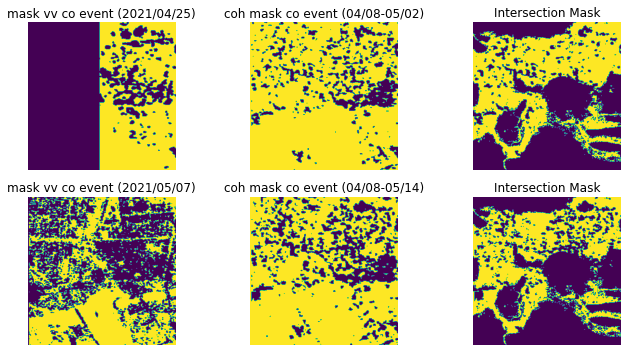

In [2]:
import skimage

from scipy.ndimage import zoom

import matplotlib.pyplot as plt

def getThreshold(data):
    
    n = data.shape[2]
    
    threshold = []
    
    for i in range(n):
        
        band_data = data[:,:,i]

        # calculate threshold using Otsu method
        threshold_otsu = skimage.filters.threshold_otsu(band_data)
        # calculate threshold using minimum method
        threshold_minimum = skimage.filters.threshold_minimum(band_data)
        # get number of pixels for both thresholds
        numPixOtsu = len(band_data[abs(band_data - threshold_otsu) < 0.1])
        numPixMinimum = len(band_data[abs(band_data - threshold_minimum) < 0.1])

        # if number of pixels at minimum threshold is less than 1% of number of pixels at Otsu threshold
        if abs(numPixMinimum/numPixOtsu) < 0.01:
            # adjust band data according
            if threshold_otsu < threshold_minimum:
                
                band_data = band_data[band_data < threshold_minimum]
                
                if np.any(band_data!=np.mean(np.ravel(band_data))):
                    
                    threshold_minimum = skimage.filters.threshold_minimum(band_data)
            else:
                
                band_data = band_data[band_data > threshold_minimum]
                threshold_minimum = skimage.filters.threshold_minimum(band_data)

            numPixMinimum = len(band_data[abs(band_data - threshold_minimum) < 0.1])

        # select final threshold
        if abs(numPixMinimum/numPixOtsu) < 0.01:
            threshold.append(threshold_otsu)
        else:
            threshold.append(threshold_minimum)

    return threshold

#dem_name='Abbotsford_dem_2012.tif'
dem_name='dem_gatineau.tif'
WSF_name='WSF2015_v1_EPSG4326_w080_n50_clip_Gatineau.tif'

dem=read_as_array(path,dem_name)

WSF_mask=read_as_array(path,WSF_name)

dem_row,dem_col=dem.shape[0],dem.shape[1]

stack_train_int=GRD_SLC_stack_train_s[:,:,[3,7]] #co-event int and coh in vv band

stack_test_int=GRD_SLC_stack_test_s[:,:,[3,7]]  #co-event int and coh in vv band

#normalization

for i in range(stack_train_int.shape[2]):

    stack_train_int[:,:,i]=np.multiply(255,(stack_train_int[:,:,i]-np.min(stack_train_int[:,:,i]))/(np.max(stack_train_int[:,:,i])-np.min(stack_train_int[:,:,i])))

    stack_test_int[:,:,i]=np.multiply(255,(stack_test_int[:,:,i]-np.min(stack_test_int[:,:,i]))/(np.max(stack_test_int[:,:,i])-np.min(stack_test_int[:,:,i])))


row=stack_train_int.shape[0]
col=stack_train_int.shape[1]

row1=stack_test_int.shape[0]
col1=stack_test_int.shape[1]


dem_r=zoom(dem,(row/dem_row,col/dem_col,1),order=0)

dem_r_test=zoom(dem,(row1/dem_row,col1/dem_col,1),order=0)

wsf_r=np.squeeze(zoom(WSF_mask,[row/WSF_mask.shape[0],col/WSF_mask.shape[1],1],order=0),axis=2)

wsf_r_test=np.squeeze(zoom(WSF_mask,[row1/WSF_mask.shape[0],col1/WSF_mask.shape[1],1],order=0),axis=2)

dem_threshold=getThreshold(dem_r)

int_coh_thresholds=getThreshold(stack_train_int)

int_coh_thresholds_test=getThreshold(stack_test_int)

#mask_vv_pre=np.zeros((row,col))
mask_vv_co=np.zeros((row,col))
#mask_hv_co=np.zeros((row,col))
mask_coh_co=np.zeros((row,col))
mask_union=np.zeros((row,col))
mask_vv_co_test=np.zeros((row1,col1))
mask_coh_co_test=np.zeros((row1,col1))
mask_union_test=np.zeros((row1,col1))
#mask_hh_co_test=np.zeros((row1,col1))
#mask_hv_co_test=np.zeros((row1,col1))

##mask_vv_pre[stack_train_int[:,:,0]<int_thresholds[0]]=1

#mask_hv_co[stack_train_int[:,:,0]<int_coh_thresholds[0]]=1 #co_event

mask_vv_co[stack_train_int[:,:,0]<int_coh_thresholds[0]]=1

mask_coh_co[stack_train_int[:,:,1]<int_coh_thresholds[1]]=1

mask_union[((mask_vv_co==1) | (mask_coh_co==1)) & (np.squeeze(dem_r,axis=2)<dem_threshold[0])]=1

#mask_hv_co_test[stack_test_int[:,:,0]<int_coh_thresholds_test[0]]=1 #co_event

mask_vv_co_test[stack_test_int[:,:,0]<int_coh_thresholds_test[0]]=1

mask_coh_co_test[stack_test_int[:,:,1]<int_coh_thresholds_test[1]]=1

mask_union_test[((mask_vv_co_test==1) | (mask_coh_co_test==1)) & (np.squeeze(dem_r_test,axis=2)<dem_threshold[0])]=1

fig,ax=plt.subplots(2,3,figsize=(10,5))

ax[0,0].imshow(mask_vv_co)

ax[0,0].axis('off')

ax[0,0].set_title('mask vv co event (2021/04/25)')

ax[0,1].imshow(mask_coh_co)

ax[0,1].axis('off')

ax[0,1].set_title('coh mask co event (04/08-05/02)')

ax[0,2].imshow(mask_union)

ax[0,2].axis('off')

ax[0,2].set_title('Intersection Mask')

ax[1,0].imshow(mask_vv_co_test)

ax[1,0].axis('off')

ax[1,0].set_title('mask vv co event (2021/05/07)')

ax[1,1].imshow(mask_coh_co_test)

ax[1,1].axis('off')

ax[1,1].set_title('coh mask co event (04/08-05/14)')

ax[1,2].imshow(mask_union_test)

ax[1,2].set_title('Intersection Mask')

ax[1,2].axis('off')

plt.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,3,figsize=(10,5))

ax[0].imshow(mask_intersection,cmap='magma') #25th April flood mask

ax[0].axis('off')

ax[1].imshow(mask_intersection_test,cmap='magma') #7th May flood mask

ax[1].axis('off')

ax[2].imshow(mask_intersection_test,cmap='magma')

ax[2].axis('off')

plt.show()

# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

def vectorize_3d_array(three_d_array):
    
    array=np.zeros((three_d_array.shape[0]*three_d_array.shape[1],three_d_array.shape[2]))
    
    for i in range(three_d_array.shape[2]):
    
        array[:,i]=np.ravel(three_d_array[:,:,i])
        
    return(array)     


preflood_1d_array=vectorize_3d_array(preflood_array_)

#postflood_1d_array=vectorize_3d_array(postflood_array_)

NDWI_pre=np.nan_to_num(np.log(np.divide((preflood_1d_array[:,0]-preflood_1d_array[:,1]),(preflood_1d_array[:,0]+preflood_1d_array[:,1]))))

#NDWI_post=np.nan_to_num(np.divide((postflood_1d_array[:,1]-postflood_1d_array[:,3]),(postflood_1d_array[:,1]+postflood_1d_array[:,3])))

pre_kmeans=KMeans(n_clusters=3,random_state=0).fit(NDWI_pre.reshape(-1,1))

preflood_cluster=pre_kmeans.predict(NDWI_pre.reshape(-1,1))

#post_kmeans=KMeans(n_clusters=3,random_state=0).fit(NDWI_post.reshape(-1,1))

#postflood_cluster=post_kmeans.predict(NDWI_post.reshape(-1,1))

# Loading Clustering Result

In [ ]:
import numpy as np
path='D:/flood_proposal'
#np.save(path+'/postflood_cluster.npy',postflood_cluster)
#np.save(path+'/preflood_cluster.npy',preflood_cluster)
#postflood_cluster=np.load(path+'/postflood_cluster.npy')
preflood_cluster=np.load(path+'/preflood_cluster.npy')

# Visualizing Clustering Result

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(5,5))

plt.imshow(np.reshape(postflood_array_,(postflood_array_.shape[0],postflood_array_.shape[1])),cmap='magma')

plt.axis('off')

plt.show()

In [ ]:
kmeans_preflood_clustering=np.reshape(preflood_cluster,(preflood_array_.shape[0],preflood_array_.shape[1]))
kmeans_postflood_clustering=np.reshape(postflood_cluster,(preflood_array_.shape[0],preflood_array_.shape[1]))

# Train Data Preparation (Part 1)

# Remove This Part

In [ ]:
def prepare_train_data(flood_array,kmeans_clustering):

    sweep=1
    i=1
    j=1

    train_sample=[] 

    label=[]
    
    central_pixel=[]

    while (i<(flood_array.shape[0]-sweep) and j<(flood_array.shape[1]-sweep)):

        #region_labels=kmeans_clustering[i-sweep:i+sweep+1,j-sweep:j+sweep+1]

        region=flood_array[i-sweep:i+sweep+1,j-sweep:j+sweep+1,:]

        while (i<(flood_array.shape[0]-sweep) and j<(flood_array.shape[1]-sweep)):

            region_previous=region

            #region_labels_previous=kmeans_clustering[i,j]
            central_pixel_label_previous=kmeans_clustering[i,j] 


            sweep+=1

            i+=1

            j+=1                                   

            #region_labels=kmeans_clustering[i-sweep:i+sweep+1,j-sweep:j+sweep+1]
            
            #central_pixel_label=kmeans_clustering[i,j]

            region=flood_array[i-sweep:i+sweep+1,j-sweep:j+sweep+1,:]

        if sweep!=1:

            train_sample.append(region_previous)
            label.append(central_pixel_label_previous)
            central_pixel.append((i,j))


        sweep=1 
        i+=1
        j+=1  

    return (train_sample,label,central_pixel)


train_sample,label,_=prepare_train_data(intensity_array_vv,label)
test_sample,label_test,central_pixel=prepare_train_data(postflood_array_,label_test)

In [3]:
from scipy.ndimage import zoom

def prepare_train_data(flood_array,label):

    row,col=flood_array.shape[0],flood_array.shape[1]
    
    neigh_size=33

    half_size=np.int((neigh_size-1)/2)

    train_sample=[]

    label_new=[]

    for i in range(half_size,row-half_size+1):

        for j in range(half_size,col-half_size+1):

            train_sample.append(flood_array[i-half_size:i+half_size+1,j-half_size:j+half_size+1,:])

            label_new.append(label[i,j])

            #central_pixel.append((i,j))

    return(train_sample,np.ravel(label_new))

def prepare_test_data(postflood_array,label_test):
    
    neigh_size=33
    
    half_size=np.int((neigh_size-1)/2)
    
    test_sample=[]
    
    label_new=[]
    
    postflood_array_pad=np.pad(postflood_array,((half_size,half_size),(half_size,half_size),(0,0)),'symmetric')
    
    label_test_pad=np.pad(label_test,((half_size,half_size),(half_size,half_size),(0,0)),'symmetric')
    
    row,col=postflood_array_pad.shape[0],postflood_array_pad.shape[1]
    
    for i in range(half_size,row-half_size+1):
        
        for j in range(half_size,col-half_size+1):
            
            test_sample.append(postflood_array_pad[i-half_size:i+half_size+1,j-half_size:j+half_size+1,:])
            
            label_new.append(label_test_pad[i,j])

            
    return(test_sample,np.ravel(label_new))       

#train_sample,label=prepare_train_data(intensity_array_vv,label)            
#test_sample,label_test=prepare_test_data(postflood_array_,label_test)


#label=zoom(label,(300/label.shape[0],300/label.shape[1],1),order=0)
mask_union=np.expand_dims(mask_union,axis=2)
train_sample,label=prepare_train_data(GRD_SLC_stack_train_s,mask_union)
mask_union_test=np.expand_dims(mask_union_test,axis=2)
#label_test=zoom(label_test,(300/label_test.shape[0],300/label_test.shape[1],1),order=0)
test_sample,label_test=prepare_test_data(GRD_SLC_stack_test_s,mask_union_test)

C:\Users\nghasem2\AppData\Local\Temp\ipykernel_10268\3758927080.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_size=np.int((neigh_size-1)/2)
C:\Users\nghasem2\AppData\Local\Temp\ipykernel_10268\3758927080.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

# Train Data Preparation (Part 2)

In [4]:
from scipy.ndimage import zoom

import random

def resample_data(data_sample,label,mode):

    data_resampled=[]
    
    label_new=[]
    
    patch_size=32
    
    #if label.ndim==2:
       
       #label=np.ravel(label) 

    for k in range(len(data_sample)):
        
        #print(data_sample[k].shape)
        
        if data_sample[k].shape<(patch_size,patch_size):

            data_resampled.append(zoom(data_sample[k],zoom=[patch_size/data_sample[k].shape[0],patch_size/data_sample[k].shape[1],1],order=3))

            label_new.append(label[k])
            
            #continue
        
        elif data_sample[k].shape==(patch_size,patch_size):
            
            data_resampled.append(data_sample[k])
            
            label_new.append(label[k])
            
        elif data_sample[k].shape>(patch_size,patch_size):
            
            for i in range(round(data_sample[k].shape[0]/patch_size)):
                
                for j in range(round(data_sample[k].shape[1]/patch_size)):

                
                    temp=data_sample[k][i*patch_size:(i+1)*patch_size,j*patch_size:(j+1)*patch_size]
                
                                
                    if temp.shape<(patch_size,patch_size):

                    
                        data_resampled.append(zoom(temp,zoom=[patch_size/temp.shape[0],patch_size/temp.shape[1],1],order=3))
                        #continue
                        label_new.append(label[k]) 

                    else:
                    
                        data_resampled.append(temp) 
                    
                        label_new.append(label[k])    
                
                   

    data_resampled=np.stack(data_resampled) 

    label_new=np.stack(label_new)

    print(f' {mode} Data Shape: {data_resampled.shape}, {mode} Label Shape: {label_new.shape}')
    
    return (data_resampled,label_new)

train_resampled,label_new=resample_data(train_sample,label,'Train')   

test_resampled,label_test_new=resample_data(test_sample,label_test,'Test')

 Train Data Shape: (72361, 32, 32, 8), Train Label Shape: (72361,)
 Test Data Shape: (90601, 32, 32, 8), Test Label Shape: (90601,)


# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#from tensorflow.data import Dataset

#def augment(train_resampled,label_new):
    
    #fliplr=[]
    
    #flipud=[]
    
    #transpose=[]
    
    #label_aug=[]
    
    #for i,l in zip(train_resampled,label_new):
        
            #fliplr.append(np.fliplr(i))
        
            #flipud.append(np.flipud(i))
        
            #transpose.append(np.transpose(i,(1,0,2)))
        
            #label_aug.extend(np.multiply(l,np.ones((3,)))) 
            
    #flip=np.concatenate((np.stack(fliplr),np.stack(flipud)),axis=0) 
    
    #transpose_flip=np.concatenate((flip,np.stack(transpose)),axis=0)
        
    #return(np.concatenate((train_resampled,transpose_flip),axis=0),np.concatenate((label_new,np.stack(label_aug)),axis=0))  
    
#train_resampled_aug,label_aug=augment(train_resampled,label_new)   

def data_augmentation(data,label_new,idx,image_count=150):

        augmented_images=[]
        
        label_aug=[]

        datagen_hflip=ImageDataGenerator(rotation_range=0.1, horizontal_flip=True)
        
        for i in idx:


            it=datagen_hflip.flow(np.expand_dims(data[i],axis=0),batch_size=1)

            for j in range(image_count):
    
                augmented_images.append(np.squeeze(it.next(),axis=0))
        
                label_aug.append(label_new[i])
        
        return(np.stack(augmented_images),np.stack(label_aug)) 
    
positive_idx,negative_idx=np.where(np.array(label_new)==0)[0],np.where(np.array(label_new)==1)[0]

#train_resampled_aug_pos,label_aug_pos=data_augmentation(train_resampled,label_new,positive_idx,20) #positive is background

train_resampled_aug_neg,label_aug_neg=data_augmentation(train_resampled,label_new,negative_idx,10)

train_resampled_aug=np.concatenate((train_resampled,train_resampled_aug_neg),axis=0)

label_aug=np.concatenate((label_new,label_aug_neg),axis=0)

In [ ]:
def normalize_data(data_resampled,mode):
    
    for i in range(data_resampled.shape[0]):

            if len(data_resampled.shape)==4:
                
                for j in range(data_resampled.shape[3]):

                    a=data_resampled[i,:,:,j]

                    min_,max_=np.min(np.ravel(data_resampled[i,:,:,j])),np.max(np.ravel(data_resampled[i,:,:,j]))

                    data_resampled[i,:,:,j]=(a-min_)/(max_-min_)
                
            elif len(data_resampled.shape)==2: 
                
                a=data_resampled[i,:]

                min_,max_=np.min(np.ravel(data_resampled[i,:])),np.max(np.ravel(data_resampled[i,:]))

                data_resampled[i,:]=(a-min_)/(max_-min_)

    print(f' {mode} Data Shape: {data_resampled.shape}') 
    
    return(data_resampled)

#del train_resampled_aug

#del test_resampled

train_resampled_aug=np.nan_to_num(normalize_data(train_resampled_aug,'Train'))

test_resampled=np.nan_to_num(normalize_data(test_resampled, 'Test'))

# Splitting data into train and validation

In [5]:
import random

from sklearn.utils import resample

train_resampled,label_new=train_resampled_aug,label_aug

positive_idx,negative_idx=np.where(np.array(label_new)==0)[0],np.where(np.array(label_new)==1)[0]

negative_num,positive_num=len(negative_idx),len(positive_idx)

tr_idx_neg=random.sample(list(negative_idx),round(0.8*negative_num))

tr_idx_pos=random.sample(list(positive_idx),round(0.8*positive_num))

tr_idx_pos_resampled=resample(tr_idx_pos,n_samples=len(tr_idx_neg),replace=True,random_state=0) #positive here is the background

tr_idx=tr_idx_neg+tr_idx_pos_resampled #merge

#val_idx=[x for x in list(np.arange(train_resampled.shape[0])) if x not in tr_idx]

val_idx_neg=[x for x in list(negative_idx) if x not in tr_idx_neg]

#val_idx_pos=random.sample([y for y in list(positive_idx) if y not in tr_idx_neg],round(0.04*positive_num))

val_idx_pos=[y for y in list(positive_idx) if y not in tr_idx_neg]

val_idx_pos_resampled=resample(val_idx_pos,n_samples=len(val_idx_neg),replace=True,random_state=0)

val_idx=val_idx_neg+val_idx_pos_resampled

train_resampled_,train_label=train_resampled[tr_idx],label_new[tr_idx]

val_resampled,val_label=train_resampled[val_idx],label_new[val_idx]

print(f' Train Data Shape: {train_resampled_.shape}, Validation Data Shape: {val_resampled.shape}')

print(f' \n Train Label Shape: {train_label.shape}, Validation Label Shape: {val_label.shape}')

 Train Data Shape: (59626, 32, 32, 8), Validation Data Shape: (14906, 32, 32, 8)
 
 Train Label Shape: (59626,), Validation Label Shape: (14906,)


In [ ]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(2,2,figsize=(10,5))

id=tr_idx_pos_resampled[:2]+tr_idx_neg[:2]

for i,ax in zip(id,axes.ravel()):
    
    ax.imshow(train_resampled[i,:,:,1])
    
    if label_new[i]==0:
    
        ax.set_title('Non Flood Sample')
        
        ax.axis('off')
    
    else:
        
        ax.set_title('Flood Sample')
        
        ax.axis('off')
    
plt.show()    

# Embedding Generator Model

## Method 1: Resnet50

In [6]:
from tensorflow.keras.applications import resnet

from tensorflow.keras import applications

from tensorflow.keras import layers,losses,optimizers,metrics,Model

import tensorflow as tf

tf.compat.v1.enable_eager_execution()

patch_size=32

cnn=resnet.ResNet50(weights=None,input_shape=(patch_size,patch_size)+(3,),include_top=False)

flatten=layers.Flatten()(cnn.output)

dense_1=layers.Dense(512,activation='relu')(flatten)

dense_1=layers.BatchNormalization()(dense_1)

dense_2=layers.Dense(256,activation='relu')(dense_1)

dense_2=layers.BatchNormalization()(dense_2)

output=layers.Dense(256)(dense_2)

embedding=Model(cnn.input,output,name='Embedding')

embedding.summary()

#for layer in cnn.layers:

    
    #if 'conv5_block3' in layer.name: #training just the last convolutional block
        
        #layer.trainable=True
        
    #else:
        
        #layer.trainable=False

Model: "Embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 4, 4, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

## Method 2: VGG16

In [ ]:
from tensorflow.keras.applications import vgg16

from tensorflow.keras import layers, Model,losses, metrics, optimizers

import tensorflow as tf

tf.compat.v1.enable_eager_execution()

patch_size=32

cnn=vgg16.VGG16(weights=None,input_shape=(patch_size,patch_size)+(3,),include_top=False)

flatten=layers.Flatten()(cnn.output)

dense_1=layers.Dense(512,activation='relu')(flatten)

dense_1=layers.BatchNormalization()(dense_1)

dense_2=layers.Dense(256,activation='relu')(dense_1)

dense_2=layers.BatchNormalization()(dense_2)

output=layers.Dense(256)(dense_2)

embedding=Model(cnn.input,output,name='Embedding')

embedding.summary()

#for layer in cnn.layers:

    
    #if 'block5' in layer.name: #training just the last convolutional block
        
        #layer.trainable=True
        
    #else:
        
        #layer.trainable=False

## Method 3: Densenet

In [ ]:
from tensorflow.keras.applications import densenet

from tensorflow.keras import layers, Model,losses, metrics, optimizers

import tensorflow as tf

tf.compat.v1.enable_eager_execution()

patch_size=32

cnn=densenet.DenseNet121(weights='imagenet',input_shape=(patch_size,patch_size)+(3,),include_top=False)

flatten=layers.Flatten()(cnn.output)

dense_1=layers.Dense(512,activation='relu')(flatten)

dense_1=layers.BatchNormalization()(dense_1)

dense_2=layers.Dense(256,activation='relu')(dense_1)

dense_2=layers.BatchNormalization()(dense_2)

output=layers.Dense(256)(dense_2)

embedding=Model(cnn.input,output,name='Embedding')

#embedding.summary()

for layer in cnn.layers:

    
    if 'conv5_block16' in layer.name: #training just the last convolutional block
        
        layer.trainable=True
        
    else:
        
        layer.trainable=False 

## Method : Conventional CNN Layers

In [ ]:
embedding_dim=256
patch_size=32

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense

embedding=Sequential([Conv2D(32,kernel_size=3,activation='relu',input_shape=(patch_size,patch_size,3)),
                     
                         Conv2D(32,kernel_size=3,activation='relu'),
                            
                         Conv2D(32,kernel_size=3,strides=2,padding='same',activation='relu'),
                      
                         Conv2D(64,kernel_size=3,activation='relu'),
                      
                         GlobalAveragePooling2D(),
                      
                         Dense(embedding_dim) 

])

print(embedding.summary())

### Creating Siamese Network Architecture With Triplets Of Anchor, Positive, and Negative Image Patches as Input

In [7]:
from tensorflow.keras.applications import resnet

from tensorflow.keras import applications

from tensorflow.keras import layers,losses,optimizers,metrics,Model

import tensorflow as tf

from tensorflow.keras.utils import plot_model

patch_size=32

anchor_input=layers.Input(name='anchor',shape=(patch_size,patch_size)+(3,))

positive_input=layers.Input(name='positive',shape=(patch_size,patch_size)+(3,))

negative_input=layers.Input(name='negative',shape=(patch_size,patch_size)+(3,))

embedding_anchor=embedding(anchor_input)
embedding_positive=embedding(positive_input)
embedding_negative=embedding(negative_input)

output=layers.concatenate([embedding_anchor,embedding_positive,embedding_negative])
#output=layers.concatenate([embedding_positive,embedding_negative])

model=Model([anchor_input,positive_input,negative_input],output)
#model=Model([positive_input,negative_input],output)

#plot_model(model,to_file='D:/Nafiseh/flood_proposal/siamese_model_contrastive_loss_intensity_coh.png',show_shapes=True,show_layer_names=True)

# Function Creating Triplets Of Anchor, Positive, and Negative Patches

In [8]:
import random

from keras.preprocessing.image import ImageDataGenerator


def create_batch_data(train_resampled,label,batch_size):
    
        
    def data_augmentation(data,image_count=1):

        augmented_images=[]
        
        patch_size=32

        datagen=ImageDataGenerator(horizontal_flip=True)

        it=datagen.flow(np.expand_dims(data,axis=0),batch_size=1)

        for i in range(image_count):
    
            augmented_images.append(np.squeeze(it.next(),axis=0))
        
        return(np.stack(augmented_images)) 
    
    anchors,positives,negatives=np.zeros((batch_size,patch_size,patch_size,3)),np.zeros((batch_size,patch_size,patch_size,3)),np.zeros((batch_size,patch_size,patch_size,3))

    positive_idx=np.squeeze(np.where(np.array(label)!=1)) #background 

        
    negative_idx=np.squeeze(np.where(np.array(label)==1))
    
    for i in range(batch_size):
        
        
        index=positive_idx[random.randint(0,len(positive_idx)-1)]

        positive=train_resampled[index]  
        
        anchor=data_augmentation(positive)
        
        label_=label[index]
        
        negative=train_resampled[negative_idx[random.randint(0,len(negative_idx)-1)]]
        
        anchors[i],positives[i],negatives[i]=anchor,positive,negative 
    
    return [anchors,positives,negatives]


# Triplet Loss

In [9]:
import tensorflow as tf

def Triplet_Loss(margin, embedding_dim):
    
    def get_loss(output_true,output_pred):
        
        anchor_output=output_pred[:,:embedding_dim]
        
        positive_output=output_pred[:,embedding_dim:2*embedding_dim]
        
        negative_output=output_pred[:,2*embedding_dim:]
        
        dp=tf.reduce_sum(tf.square(anchor_output-positive_output),axis=1)
        
        dn=tf.reduce_sum(tf.square(anchor_output-negative_output),axis=1)
        
        return tf.maximum(dp-dn+margin,0)
        
    return get_loss    

# Contrastive Loss

In [ ]:
def Contrastive_Loss(margin,embedding_dim,tav): #tav:maximum acceptable distance between similar samples
    
    def get_loss(output_true,output_pred):
        
        input1=output_pred[:,:embedding_dim]
        
        input2=output_pred[:,embedding_dim:2*embedding_dim]
        
        d=tf.reduce_sum(tf.square(input1-input2))
        
        return(output_true*tf.maximum(margin-d,0)+(1-output_true)*tf.maximum(d-tav,0))  
    
    return get_loss

# Weighted Double Margin Contrastive Loss (WDMCL)

In [ ]:
def Weighted_Double_Margin_Contrastive_Loss(embedding_dim,w1,w2 ,m1=0.9,m2=0.45):
    
    def get_loss(output_true,output_pred):

        
        input1=output_pred[:,:embedding_dim]
    
        input2=output_pred[:,embedding_dim:2*embedding_dim]
        
        d=tf.reduce_sum(tf.square(input1-input2))
        
        return(0.5*((w1*(1-output_true)*(tf.maximum(d-m1,0))**2)+(w2*output_true*(tf.maximum(m2-d,0))**2)))
    
    return(get_loss)       

In [10]:
def Data_Generator(train_resampled,label,batch_size,embedding_dim,mode):
    
    while True:
    
        x=create_batch_data(train_resampled,label,batch_size)
        
        if mode=='triplet':
        
            y=np.zeros((batch_size,3*embedding_dim))
            
        else:
            
            x=x[1:]
            
            y=np.zeros((batch_size,2*embedding_dim))
        
        yield x,y

# Apply PCA transfrom on training data

In [11]:
from sklearn.decomposition import PCA


def apply_pca_transform(data,n_components=3,patch_size=32):

    def make_2d_feature_map_1d(data):

        data_ravel=np.zeros((data.shape[0],data.shape[1]*data.shape[2],data.shape[3]))

        for i in range(data.shape[0]):

            for j in range(data.shape[3]):

                 data_ravel[i,:,j]=np.ravel(data[i,:,:,j])

        return(data_ravel)      


    data_1d=make_2d_feature_map_1d(data)

    data_transformed=[]
    data_transformed_2d=[]

    pca=PCA(n_components=3)

    for k in range(data_1d.shape[0]):

        data_transformed.append(pca.fit_transform(data_1d[k,:,:]))

        data_transformed_2d.append(np.reshape(data_transformed[k],(patch_size,patch_size,n_components)))
      
    return(np.array(data_transformed_2d))

train_resampled__=apply_pca_transform(train_resampled_)
val_resampled__=apply_pca_transform(val_resampled)

# Fitting The Siamese Model and Setting Training Parameters

In [12]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, SGD


batch_size,embedding_dim, epochs=50, 256, 200

lr_schedule=ExponentialDecay(0.0001,decay_rate=0.8,decay_steps=10000)

model.compile(loss=Triplet_Loss(margin=0.9, embedding_dim=embedding_dim),optimizer=Adam(learning_rate=lr_schedule))

        
w1=1/(len(train_label[train_label==0])) # weight for unchanged pixels
        
w2=1/(len(train_label[train_label==1])) # weight for changed pixels


#Weighted_Double_Margin_Contrastive_Loss(embedding_dim,w1,w2,m1=0.9,m2=0.45)
#model.compile(loss=Contrastive_Loss(embedding_dim=embedding_dim,margin=0.01,tav=0.01),optimizer=Adam(learning_rate=lr_schedule))

es=EarlyStopping(monitor='val_loss',patience=30,restore_best_weights=True)

mch=ModelCheckpoint(filepath='D:/Nafiseh/flood_proposal/gatineau_int_coh_Triplet_loss.h5',save_best_only=True)

val_data=create_batch_data(val_resampled__,val_label,val_resampled.shape[0])

#val_data=val_data[1:] #omitting the anchor images


history=model.fit(Data_Generator(train_resampled__,train_label,batch_size,embedding_dim,'triplet'),steps_per_epoch=int(train_resampled__.shape[0]/batch_size),epochs=epochs,callbacks=[es,mch],validation_data=(val_data,val_label))

Epoch 1/200
1192/1192 [==============================] - 464s 376ms/step - loss: 3.1942 - val_loss: 0.7722
Epoch 2/200
1192/1192 [==============================] - 447s 375ms/step - loss: 0.3252 - val_loss: 0.2023
Epoch 3/200
1192/1192 [==============================] - 436s 366ms/step - loss: 0.1163 - val_loss: 0.0974
Epoch 4/200
1192/1192 [==============================] - 447s 375ms/step - loss: 0.0549 - val_loss: 0.0723
Epoch 5/200
1192/1192 [==============================] - 449s 377ms/step - loss: 0.0417 - val_loss: 0.0540
Epoch 6/200
1192/1192 [==============================] - 447s 375ms/step - loss: 0.0298 - val_loss: 0.0392
Epoch 7/200
1192/1192 [==============================] - 442s 371ms/step - loss: 0.0275 - val_loss: 0.0395
Epoch 8/200
1192/1192 [==============================] - 443s 372ms/step - loss: 0.0250 - val_loss: 0.0468
Epoch 9/200
1192/1192 [==============================] - 447s 375ms/step - loss: 0.0173 - val_loss: 0.0264
Epoch 10/200
1192/1192 [=============

In [ ]:
import sys

sys.path.append('C:/ProgramData/Anaconda3/envs/tf2.8/lib/site-packages/h5py')

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')

plt.ylabel('Tripplet Loss')

plt.legend(['Train','Validation'])

plt.show()

In [ ]:
model.save('D:/Nafiseh/flood_proposal/siamese_intensity_coh_without_dem_vgg16_gatineau.h5')

In [ ]:
from tensorflow.keras.models import load_model


#model=load_model('D:/Nafiseh/flood_proposal/siamese_intensity_coh_partial_TR_contrastive_loss_downsampling.h5',compile=False)
model=load_model('D:/Nafiseh/flood_proposal/siamese_intensity_coh_contrastive_loss_gatineau_with_dem.h5',compile=False)

In [13]:
import pickle

with open('D:/Nafiseh/flood_proposal/training_history_gatineau_int_coh_Triplet_loss.pckl', 'wb') as hist:
    
    pickle.dump(history.history,hist)

In [ ]:
import pickle

f=open('D:/Nafiseh/flood_proposal/training history_resnet50_intensity_coh_partial_TR_weighted_contrastive_loss.pckl','rb')

history=pickle.load(f)

f.close()

# Prediction

In [15]:
from sklearn.utils import shuffle

from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras import layers,Model,regularizers

embedding_dim=256

patch_size=32

input_layer=layers.Input(shape=(embedding_dim,))

flatten1=layers.Flatten()(input_layer)

dense1=layers.Dense(64)(flatten1)

LR1=LeakyReLU(alpha=0.1)(dense1)

dense2=layers.Dense(64)(LR1)

LR2=LeakyReLU(alpha=0.1)(dense2)

drop1=layers.Dropout(0.1)(LR2)

#dense3=layers.Dense(128,kernel_regularizer=regularizers.l1(0.0001))(drop1)

#LR3=LeakyReLU(alpha=0.1)(dense3)

#drop2=layers.Dropout(0.5)(LR3)

#dense4=layers.Dense(64,kernel_regularizer=regularizers.l1(0.0001))(drop2)

#LR4=LeakyReLU(alpha=0.1)(dense4)

dense5=layers.Dense(32)(drop1)

LR5=LeakyReLU(alpha=0.1)(dense5)

prediction_layer=layers.Dense(2,activation='softmax')(LR5)

model1=Model(input_layer,prediction_layer,name='prediction_model')

train_data=create_batch_data(train_resampled__,train_label,train_resampled__.shape[0])

#train_data=train_data[1:] #omitting the anchor images

##train_label_pos,train_label_neg=train_label[np.where(train_label==0)[0]],train_label[np.where(train_label==1)[0]]
#train_data_s=[]

#val_data_s=[]

#train_data_s.append(train_data[0][:5000])

#train_data_s.append(train_data[1][:5000])

#val_data_s.append(val_data[0][:200])

#val_data_s.append(val_data[1][:200])

train_prediction=model.predict(train_data)

val_prediction=model.predict(val_data)

# Selecting A Subset Of Train And Validation Data (Memory Issue)

In [ ]:
def subset(data,label):

    random.seed(1)

    pos_idx,neg_idx=np.where(np.array(label)==1)[0],np.where(np.array(label)==0)[0]

    pos_idx_subset,neg_idx_subset=random.sample(list(pos_idx),500),random.sample(list(neg_idx),500)

    test_idx_subset=pos_idx_subset+neg_idx_subset

    data_s=[data[i,:] for i in test_idx_subset]

    label_s=[label[j] for j in test_idx_subset]
    
    return(np.stack(data_s),np.stack(label_s))

#train_prediction_s,train_label_s=subset(train_prediction,train_label)

#val_prediction_s,val_label_s=subset(val_prediction,val_label)

# Senario 1: Difference Feature Vectors As Trainin Data to the Network

In [ ]:
train_diff_pos=train_prediction[:,:embedding_dim]-train_prediction[:,embedding_dim:2*embedding_dim]

train_diff_neg=train_prediction[:,:embedding_dim]-train_prediction[:,2*embedding_dim:]

train_diff=np.concatenate((train_diff_pos,train_diff_neg),axis=0)

train_diff_label=np.concatenate((np.zeros((len(train_diff_pos),)),np.ones((len(train_diff_neg),))),axis=0)

val_diff_pos=val_prediction[:,:embedding_dim]-val_prediction[:,embedding_dim:2*embedding_dim]

val_diff_neg=val_prediction[:,:embedding_dim]-val_prediction[:,2*embedding_dim:]

val_diff=np.concatenate((val_diff_pos,val_diff_neg),axis=0)

val_diff_label=np.concatenate((np.zeros((len(val_diff_pos),)),np.ones((len(val_diff_neg),))),axis=0)

# Senario 2: The Original Feature Vectors As Training Data to the Network

In [18]:
anchor_f=train_prediction[:,:embedding_dim]
pos_f=train_prediction[:,embedding_dim:2*embedding_dim]
neg_f=train_prediction[:,2*embedding_dim:]
train_pos,train_neg=np.concatenate((anchor_f,pos_f),axis=0),neg_f
train_fv=np.concatenate((train_pos,train_neg),axis=0)

pos_num=len(anchor_f)+len(pos_f)
neg_num=len(neg_f)
train_fv_label=np.concatenate((np.zeros((pos_num,)),np.ones((neg_num,))),axis=0)

anchor_f_val,pos_f_val=val_prediction[:,:embedding_dim],val_prediction[:,embedding_dim:2*embedding_dim]
neg_f_val=val_prediction[:,2*embedding_dim:]
val_pos,val_neg=np.concatenate((anchor_f_val,pos_f_val),axis=0),neg_f_val
val_fv=np.concatenate((val_pos,val_neg),axis=0)
pos_num_val=len(anchor_f_val)+len(pos_f_val)
neg_num_val=len(neg_f_val)
val_fv_label=np.concatenate((np.zeros((pos_num_val,)),np.ones((neg_num_val,))),axis=0)

In [17]:
pos_f=train_prediction[:,:embedding_dim]
neg_f=train_prediction[:,embedding_dim:]
train_fv=np.concatenate((pos_f,neg_f),axis=0)

pos_num=len(pos_f)
neg_num=len(neg_f)
train_fv_label=np.concatenate((np.zeros((pos_num,)),np.ones((neg_num,))),axis=0)

pos_f_val,neg_f_val=val_prediction[:,:embedding_dim],val_prediction[:,embedding_dim:]
val_fv=np.concatenate((pos_f_val,neg_f_val),axis=0)
pos_num_val=len(pos_f_val)
neg_num_val=len(neg_f_val)
val_fv_label=np.concatenate((np.zeros((pos_num_val,)),np.ones((neg_num_val,))),axis=0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 256 and the array at index 1 has size 512

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam,SGD,Adadelta

from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers.schedules import ExponentialDecay

#anchor_embedding_train,positive_embedding_train,negative_embedding_train=train_prediction[:,:256],train_prediction[:,256:2*256],train_prediction[:,2*256:3*256]

#embedding_t,label_t=shuffle(np.concatenate((positive_embedding_train,negative_embedding_train),axis=0),np.concatenate((train_label_pos,train_label_neg),axis=0),random_state=2)

lr_Schedule1=ExponentialDecay(0.0001,decay_rate=0.8,decay_steps=1000)

es1=EarlyStopping(monitor='val_loss',min_delta=1e-4,patience=100,restore_best_weights=True)

model1.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=lr_Schedule1),metrics=['accuracy'])

history1=model1.fit(train_fv,to_categorical(train_fv_label,num_classes=2),batch_size=80, epochs=300,callbacks=[es1],validation_data=(val_fv,to_categorical(val_fv_label,num_classes=2)))

Epoch 1/300
2236/2236 [==============================] - 26s 11ms/step - loss: 0.6062 - accuracy: 0.6775 - val_loss: 0.5936 - val_accuracy: 0.6824
Epoch 2/300
2236/2236 [==============================] - 25s 11ms/step - loss: 0.5980 - accuracy: 0.6814 - val_loss: 0.5904 - val_accuracy: 0.6827
Epoch 3/300
2236/2236 [==============================] - 26s 12ms/step - loss: 0.5958 - accuracy: 0.6827 - val_loss: 0.5885 - val_accuracy: 0.6855
Epoch 4/300
2236/2236 [==============================] - 26s 12ms/step - loss: 0.5942 - accuracy: 0.6832 - val_loss: 0.5874 - val_accuracy: 0.6854
Epoch 5/300
2236/2236 [==============================] - 25s 11ms/step - loss: 0.5936 - accuracy: 0.6841 - val_loss: 0.5869 - val_accuracy: 0.6863
Epoch 6/300
2236/2236 [==============================] - 24s 11ms/step - loss: 0.5934 - accuracy: 0.6839 - val_loss: 0.5866 - val_accuracy: 0.6865
Epoch 7/300
2236/2236 [==============================] - 25s 11ms/step - loss: 0.5928 - accuracy: 0.6846 - val_loss: 0

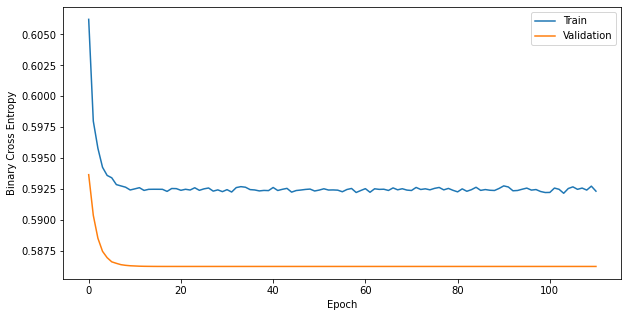

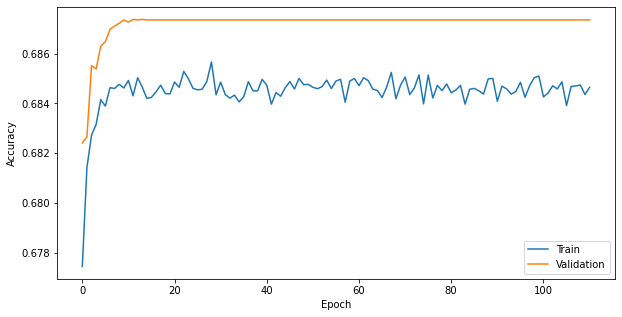

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(history1.history['loss'])

plt.plot(history1.history['val_loss'])

plt.xlabel('Epoch')

plt.ylabel('Binary Cross Entropy')

plt.legend(['Train','Validation'])


plt.figure(figsize=(10,5))

plt.plot(history1.history['accuracy'])

plt.plot(history1.history['val_accuracy'])

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend(['Train','Validation'])

plt.show()

In [21]:
model1.save('D:/Nafiseh/flood_proposal/prediction_layer_model_intensity_coh_Triplet_loss_gatneau.h5') #name is wrong

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU

model1=load_model('D:/Nafiseh/flood_proposal/prediction_layer_model_intensity_coh_Triplet_loss_gatineua.h5',compile=False)

OSError: No file or directory found at D:/Nafiseh/flood_proposal/prediction_layer_model_intensity_coh_Triplet_loss_gatineua.h5

In [ ]:
!pip install cython

!pip install h5py

In [23]:
import pickle

with open('D:/Nafiseh/flood_proposal/prediction_layer_history_intensity_coh_Triplet_loss_gatineau.pckl','wb') as hist:
    
    pickle.dump(history1.history,hist)

In [ ]:
import pickle

f=open('D:/Nafiseh/flood_proposal/prediction_layer_model_intensity_coh_partial_TR_weighted_contrastive_loss.pckl','rb')

history1=pickle.load(f)

f.close()

# Training Resnet50 From Scratch

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam, SGD


batch_size,embedding_dim, epochs=50, 256, 200
es=EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)

lr_schedule=ExponentialDecay(0.0001,decay_rate=0.8,decay_steps=10000)

model.compile(loss=Triplet_Loss(margin=0.9, embedding_dim=embedding_dim),optimizer=Adam(learning_rate=lr_schedule))

es1=EarlyStopping(monitor='val_loss',min_delta=1e-4,patience=100,restore_best_weights=True)

embedding.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=lr_Schedule),metrics=['accuracy'])

history1=embedding.fit(train_resampled_,to_categorical(train_label,num_classes=2),batch_size=80, epochs=300,callbacks=[es1],validation_data=(val_resampled,to_categorical(val_label,num_classes=2)))

In [27]:
def create_change_map(model,model1,train_data,test_resampled,label_test_new,embedding_dim):

    test_label_p=[]
    
    #preflood_resampled_expanded=preflood_resampled

    for i in range(len(test_resampled)):
        
        embedding_input=np.expand_dims(test_resampled[i],axis=0)
        
        if i>=len(train_data[0]): #end of the train data
            
            if i%len(train_data[0])==0:
                
               k=0 
            

            train_anchor=np.expand_dims(train_data[0][k,:,:,:],axis=0)
            
            train_pos=np.expand_dims(train_data[1][k,:,:,:],axis=0)
            
            train_neg=np.expand_dims(train_data[2][k,:,:,:],axis=0)
            
            k+=1
        
        else:
            

            train_anchor=np.expand_dims(train_data[0][i,:,:,:],axis=0)

            train_pos=np.expand_dims(train_data[1][i,:,:,:],axis=0)

            train_neg=np.expand_dims(train_data[2][i,:,:,:],axis=0)

        if label_test_new[i]==1: #change

            embedding=model.predict([train_anchor,train_pos,embedding_input])
            
        elif label_test_new[i]==0: #no change

            embedding=model.predict([train_anchor,embedding_input,train_neg])
        
        #prediction=np.expand_dims(prediction,axis=0)
        
        if label_test_new[i]==1: #change

            test_label_p.append(np.argmax(model1.predict(embedding[:,2*embedding_dim:])))
        
        elif label_test_new[i]==0: #no change
            
            test_label_p.append(np.argmax(model1.predict(embedding[:,embedding_dim:2*embedding_dim])))
            
                            
    return(test_label_p) 

#test_resampled,label_test_new=resample_data(test_sample,label_test,'Test')

test_resampled__=apply_pca_transform(test_resampled)

#test_label_p=create_change_map(embedding,model1,train_data,test_resampled__,label_test_new,embedding_dim) #embedding do the same job as model

test_label_p=create_change_map(model,model1,train_data,test_resampled__,label_test_new,embedding_dim)   

In [24]:
def create_change_map(model,model1,train_data,test_resampled,label_test_new,embedding_dim):

    test_label_p=[]
    
    #preflood_resampled_expanded=preflood_resampled

    for i in range(len(test_resampled)):
        
        embedding_input=np.expand_dims(test_resampled[i],axis=0)
        
        if i>=len(train_data[0]): #end of the train data
            
            if i%len(train_data[0])==0:
                
               k=0 
            
            train_pos=np.expand_dims(train_data[0][k,:,:,:],axis=0)
            
            train_neg=np.expand_dims(train_data[1][k,:,:,:],axis=0)
            
            k+=1
        
        else:

            train_pos=np.expand_dims(train_data[0][i,:,:,:],axis=0)

            train_neg=np.expand_dims(train_data[1][i,:,:,:],axis=0)

        if label_test_new[i]==1: #change

            embedding=model.predict([train_pos,embedding_input])
            
        elif label_test_new[i]==0: #no change

            embedding=model.predict([embedding_input,train_neg])
        
        #prediction=np.expand_dims(prediction,axis=0)
        
        if label_test_new[i]==1: #change

            test_label_p.append(np.argmax(model1.predict(embedding[:,embedding_dim:])))
        
        elif label_test_new[i]==0: #no change
            
            test_label_p.append(np.argmax(model1.predict(embedding[:,:embedding_dim])))
            
                            
    return(test_label_p) 

#test_resampled,label_test_new=resample_data(test_sample,label_test,'Test')

test_resampled__=apply_pca_transform(test_resampled)

#test_label_p=create_change_map(embedding,model1,train_data,test_resampled__,label_test_new,embedding_dim) #embedding do the same job as model

test_label_p=create_change_map(model,model1,train_data,test_resampled__,label_test_new,embedding_dim)   

ValueError: in user code:

    File "C:\ProgramData\Anaconda3\envs\tf2.8\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\envs\tf2.8\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\envs\tf2.8\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\ProgramData\Anaconda3\envs\tf2.8\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\ProgramData\Anaconda3\envs\tf2.8\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\envs\tf2.8\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model" expects 3 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 32, 32, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 32, 32, 3) dtype=float32>]


In [ ]:
np.savez('D:/Nafiseh/flood_proposal/saved_files.npz',model,model1,train_data,test_resampled__,label_test_new,embedding_dim)

In [ ]:
import numpy as np

files=np.load('D:/Nafiseh/flood_proposal/saved_files.npz',allow_pickle=True)

train_data,test_resampled__,label_test_new,embedding_dim=files['arr_2'],files['arr_3'],files['arr_4'],files['arr_5']

In [28]:
import numpy as np
np.save('D:/Nafiseh/flood_proposal/gatineau_change_labels_intensity_coh_Triplet_loss.npy', test_label_p)
#test_label_p=np.load('D:/Nafiseh/flood_proposal/gatineau_change_labels_intensity_coh_with_dem.npy')
#test_label_p=np.load('D:/Nafiseh/flood_proposal/gatineau_change_labels_intensity_coh_partial_TR.npy')

In [ ]:
def normalize_rgb(image):
    
    for i in range(image.shape[2]):

        image[:,:,i]=np.multiply((image[:,:,i]-np.min(image[:,:,i]))/(np.max(image[:,:,i])-np.min(image[:,:,i])),255)
  
    return(image)    

# Visualizing The Result

C:\Users\nghasem2\AppData\Local\Temp\ipykernel_10268\1808765137.py:49: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_eye=np.int(np.floor((y_new_utm-uly_eye)/yres_eye))
C:\Users\nghasem2\AppData\Local\Temp\ipykernel_10268\1808765137.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

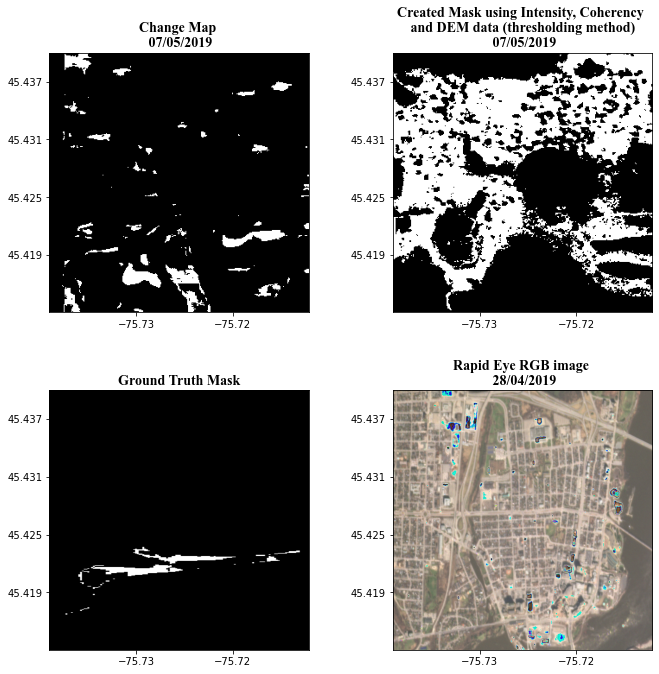

In [31]:
from osgeo import gdal,osr

import matplotlib.pyplot as plt

import utm

import numpy as np

path='D:/Nafiseh/flood_proposal'

#stack_image_name='subset_0_of_S1A_IW_GRDH_1SDV_Cal_Spk_TC_Stack.tif'

stack_image_name='subset_1_of_S1A_IW_GRDH_1SDV_20190408T225218_20190507T23009_Cal_Spk_TC_Stack_2_subset.tif'

Rapid_Eye_Image_name='clip_0428_clip_3.tif'

image_array=read_as_array(path,Rapid_Eye_Image_name)

gt=read_as_array(path,'binary_subset_edge_modified_ground_truth.tif')

ds=gdal.Open(path+'/'+stack_image_name)

rapid_eye_ds=gdal.Open(path+'/'+Rapid_Eye_Image_name)

ulx,xres,xskew,uly,yskew,yres=ds.GetGeoTransform()

uly_eye,yres_eye,yskew_eye,ulx_eye,xskew_eye,xres_eye=rapid_eye_ds.GetGeoTransform()

#row,col=1501,1501

#row,col=1379-1011+1,1055-505+1

row,col=301,301

row_ul_new,col_ul_new=780,0

row_lr_new,col_lr_new=1080,300

def find_new_pixel_cor(row_new,col_new,ulx,uly,ulx_eye,uly_eye,xres,yres,xres_eye,yres_eye):

    x_new=col_new*xres+ulx

    y_new=row_new*yres+uly

    utm_cor=utm.from_latlon(y_new,x_new)

    y_new_utm,x_new_utm=utm_cor[0],utm_cor[1]

    row_eye=np.int(np.floor((y_new_utm-uly_eye)/yres_eye))

    col_eye=np.int(np.floor((x_new_utm-ulx_eye)/xres_eye))
    
    return(x_new,y_new,row_eye,col_eye)

x_new,y_new,row_ul_eye,col_ul_eye=find_new_pixel_cor(row_ul_new,col_ul_new,ulx,uly,ulx_eye,uly_eye,xres,yres,xres_eye,yres_eye)

_,_,row_lr_eye,col_lr_eye=find_new_pixel_cor(row_lr_new,col_lr_new,ulx,uly,ulx_eye,uly_eye,xres,yres,xres_eye,yres_eye)

RGB_image_array=image_array[:row_lr_eye+1,col_ul_eye:col_lr_eye+1,[2,1,0]]

ul_x_new,ul_y_new=x_new,y_new

BBOX=[ul_x_new, ul_x_new+xres*300, ul_y_new+yres*300, ul_y_new]

change_map=np.reshape(test_label_p,(row,col))

label_test_new_2D=np.reshape(label_test_new,(row,col))

orig_map=plt.cm.get_cmap('binary')

reversed_map=orig_map.reversed()

fig,ax=plt.subplots(2,2,figsize=(10,10))

ax=np.ravel(ax)

plt.setp(ax, xticks=np.round(np.arange(BBOX[0],BBOX[1],0.01),2), yticks=np.round(np.arange(BBOX[2],BBOX[3],0.006),3))

ax[0].imshow(change_map, extent=BBOX, aspect='equal',cmap=reversed_map)

ax[0].set_title('Change Map \n 07/05/2019',fontname='Times New Roman', fontweight='bold', fontsize=14)

ax[1].imshow(label_test_new_2D,extent=BBOX, aspect='equal', cmap=reversed_map)

ax[1].set_title('Created Mask using Intensity, Coherency \n and DEM data (thresholding method) \n 07/05/2019',fontname='Times New Roman', fontweight='bold',fontsize=14)

ax[2].imshow(gt,extent=BBOX,aspect='equal',cmap=reversed_map)

ax[2].set_title('Ground Truth Mask',fontname='Times New Roman',fontweight='bold',fontsize=14)

ax[3].imshow(np.divide(RGB_image_array,(8,8,8)).astype('uint8'), extent=BBOX)

ax[3].set_title('Rapid Eye RGB image \n 28/04/2019', fontname='Times New Roman', fontweight='bold',fontsize=14)

fig.tight_layout(pad=3)

#plt.savefig('D:/Nafiseh/flood_proposal/intensity_coh_Triplet_loss_gatineau.tif')

plt.show()

# Save Change Map and Ground Truth Map as Geo Tiff

In [ ]:
from osgeo import gdal, osr

def Write_array_as_geotiff(array,ul_x_new,ul_y_new,raster_name):

    ds=gdal.Open('D:/Nafiseh/flood_proposal/subset_0_of_S1A_IW_GRDH_1SDV_Cal_Spk_TC_Stack.tif')

    ulx,xres,xskew,uly,yskew,yres=ds.GetGeoTransform()

    geotransform=(ul_x_new, xres, xskew, ul_y_new, yskew, yres)

    raster=gdal.GetDriverByName('GTiff').Create(raster_name,301,301,1,gdal.GDT_Float32)

    raster.SetGeoTransform(geotransform)

    srs=osr.SpatialReference()

    srs.ImportFromEPSG(4326)
    
    raster.GetRasterBand(1).WriteArray(array)
    
    raster.GetRasterBand(1).SetNoDataValue(0)
    
    raster.FlushCache() ##saves to disk
    
    raster=None
    
    ds=None


Write_array_as_geotiff(change_map,ul_x_new,ul_y_new,'D:/Nafiseh/flood_proposal/gatineau_CHM_contrastive_Loss_intensity_coh_with_dem.tif')

#Write_array_as_geotiff(label_test_new_2D,ul_x_new,ul_y_new,'D:/Nafiseh/flood_proposal/Change_mask_07052019.tif')

In [ ]:
test_resampled_s,label_test_s=subset(test_resampled,label_test_new)

test_data=create_batch_data(test_resampled_s,label_test_s,test_resampled_s.shape[0])

prediction=model.predict(test_data)

diff_pr_pos=prediction[:,:embedding_dim]-prediction[:,embedding_dim:2*embedding_dim]

diff_pr_neg=prediction[:,:embedding_dim]-prediction[:,2*embedding_dim:]

diff_pr=np.concatenate((diff_pr_pos,diff_pr_neg),axis=0)

#anchor_embedding_test,positive_embedding_test,negative_embedding_test=prediction[:,:256],prediction[:,256:2*256],prediction[:,2*256:3*256]

test_label_p=np.argmax(model1.predict(diff_pr),axis=1)

#dist_pos=np.square(np.expand_dims(np.sum(np.power(diff_pr_pos,2),axis=1),axis=1))
#dist_neg=np.square(np.expand_dims(np.sum(np.power(diff_pr_neg,2),axis=1),axis=1))

#diff_power=np.concatenate((dist_pos,dist_neg),axis=1)

#test_label_p2=np.argmin(diff_power,axis=1)

In [ ]:
test_resampled_s,label_test_s=subset(test_resampled,label_test_new)

test_data=create_batch_data(test_resampled_s,label_test_s,test_resampled_s.shape[0])

prediction=model.predict(test_data)

pr_anchor,pr_pos,pr_neg=prediction[:,:embedding_dim],prediction[:,embedding_dim:2*embedding_dim],prediction[:,2*embedding_dim:]

pr=np.concatenate((pr_anchor,pr_pos,pr_neg),axis=0)

test_label_p=np.argmax(model1.predict(pr),axis=1)

In [ ]:
!conda install -c conda-forge jupyter_conda

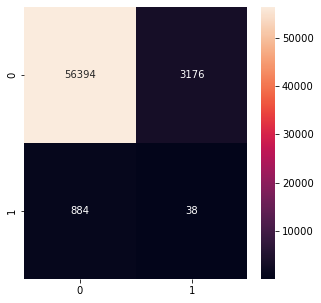

In [33]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.ndimage import zoom

row,col=301,301

plt.figure(figsize=(5,5))

gt=read_as_array('D:/Nafiseh/flood_proposal/','binary_subset_edge_modified_ground_truth.tif')

change_map=np.reshape(test_label_p,(row,col))

test_label_p_r=zoom(change_map,[gt.shape[0]/change_map.shape[0],gt.shape[1]/change_map.shape[1]],order=0)

sns.heatmap(confusion_matrix(np.ravel(gt),np.ravel(test_label_p_r)),annot=True,fmt='d')

plt.savefig('D:/Nafiseh/flood_proposal/confusion_matrix_gatineau_intensity_coh_Triplet_loss.tif')

text_file=open('D:/Nafiseh/flood_proposal/classification_report_gatineau_intensity_coh_Triplet_loss.txt','a')

print(classification_report(np.ravel(gt),np.ravel(test_label_p_r)),file=text_file)

text_file.close()